<h1>Prédiction de la probabilité de victoire :</h1>

Apprentissage supervisé :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

pd.set_option('max_columns', 25)

df = pd.read_csv("atp_data.csv")

In [2]:
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,Tarango J.,6,59,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,Luxa P.,73,174,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,Dupuis A.,33,78,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,Arazi H.,206,35,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


On récupère les index des matchs non finis à la régulière ( autre que Completed)

In [3]:
df.Comment.unique()

array(['Completed', 'Retired', 'Walkover', 'Disqualified'], dtype=object)

In [4]:
match_non_fini = df[(df.Comment == 'Retired')| (df.Comment == "Walkover") | (df.Comment == "Disqualified")].index

In [5]:
df = df.drop(match_non_fini)
df.index = range(len(df.index)) 

In [6]:
df =df.dropna(how="any")

In [7]:
df

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
8365,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Ulihrach B.,Kiefer N.,246,58,2.0,0.0,Completed,2.210,1.719,2.200,1.615,1486.195239,1618.182210,0.318694
8366,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Youzhny M.,Schuettler R.,43,6,2.0,0.0,Completed,3.250,1.385,2.875,1.364,1615.057648,1820.759485,0.234313
8367,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Sargsian S.,Carraz G.,39,67,2.0,1.0,Completed,1.746,2.180,1.571,2.250,1654.468551,1588.330984,0.594046
8369,2,Chennai,TATA Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Lisnard J.R.,Pless K.,97,440,2.0,0.0,Completed,1.562,2.580,1.571,2.250,1533.308961,1473.299803,0.585511
8370,2,Chennai,TATA Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Levy H.,Portas A.,111,85,2.0,0.0,Completed,1.641,2.360,1.570,2.250,1401.283125,1418.621881,0.475068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43010,17,Dubai,Dubai Tennis Championships,2018-03-03,ATP500,Outdoor,Hard,The Final,3,Bautista Agut R.,Pouille L.,23,15,2.0,0.0,Completed,1.650,2.430,1.660,2.200,1835.901543,1842.459807,0.490563
43011,16,Acapulco,Abierto Mexicano,2018-03-03,ATP500,Outdoor,Hard,Semifinals,3,Anderson K.,Donaldson J.,8,59,2.0,1.0,Completed,1.340,3.630,1.300,3.500,1843.576914,1647.967561,0.755103
43012,18,Sao Paulo,Brasil Open,2018-03-03,ATP250,Indoor,Clay,Semifinals,3,Jarry N.,Zeballos H.,73,69,2.0,1.0,Completed,1.850,2.090,1.900,1.900,1588.293069,1619.758421,0.454841
43013,16,Acapulco,Abierto Mexicano,2018-03-04,ATP500,Outdoor,Hard,The Final,3,Del Potro J.M.,Anderson K.,9,8,2.0,0.0,Completed,1.520,2.750,1.500,2.620,1966.532849,1851.413609,0.659862


In [8]:
#df["proba_winner_Pinnacle"]= 1/df.PSW
#df["proba_loser_Pinnacle"]=1/df.PSL
#df["proba_winner_Bet365"]=1/df.B365W
#df["proba_loser_Bet365"]=1/df.B365L


Déterminer la proba_elo de victoire :

In [9]:
df = df. drop(["ATP", "Location","Tournament","Date","Series","Wsets","Lsets","Comment","Winner","Loser"], axis=1)

In [10]:
df

,Court,Surface,Round,Best of,WRank,LRank,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
8365,Outdoor,Hard,1st Round,3,246,58,2.210,1.719,2.200,1.615,1486.195239,1618.182210,0.318694
8366,Outdoor,Hard,1st Round,3,43,6,3.250,1.385,2.875,1.364,1615.057648,1820.759485,0.234313
8367,Outdoor,Hard,1st Round,3,39,67,1.746,2.180,1.571,2.250,1654.468551,1588.330984,0.594046
8369,Outdoor,Hard,1st Round,3,97,440,1.562,2.580,1.571,2.250,1533.308961,1473.299803,0.585511
8370,Outdoor,Hard,1st Round,3,111,85,1.641,2.360,1.570,2.250,1401.283125,1418.621881,0.475068
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43010,Outdoor,Hard,The Final,3,23,15,1.650,2.430,1.660,2.200,1835.901543,1842.459807,0.490563
43011,Outdoor,Hard,Semifinals,3,8,59,1.340,3.630,1.300,3.500,1843.576914,1647.967561,0.755103
43012,Indoor,Clay,Semifinals,3,73,69,1.850,2.090,1.900,1.900,1588.293069,1619.758421,0.454841
43013,Outdoor,Hard,The Final,3,9,8,1.520,2.750,1.500,2.620,1966.532849,1851.413609,0.659862


In [11]:
from sklearn import preprocessing
feature=df[["Court","Surface","Round"]]
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in feature.columns :
   df[i]=label.fit_transform(feature[i])

In [12]:
df

,Court,Surface,Round,Best of,WRank,LRank,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
8365,1,3,0,3,246,58,2.210,1.719,2.200,1.615,1486.195239,1618.182210,0.318694
8366,1,3,0,3,43,6,3.250,1.385,2.875,1.364,1615.057648,1820.759485,0.234313
8367,1,3,0,3,39,67,1.746,2.180,1.571,2.250,1654.468551,1588.330984,0.594046
8369,1,3,0,3,97,440,1.562,2.580,1.571,2.250,1533.308961,1473.299803,0.585511
8370,1,3,0,3,111,85,1.641,2.360,1.570,2.250,1401.283125,1418.621881,0.475068
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43010,1,3,7,3,23,15,1.650,2.430,1.660,2.200,1835.901543,1842.459807,0.490563
43011,1,3,6,3,8,59,1.340,3.630,1.300,3.500,1843.576914,1647.967561,0.755103
43012,0,1,6,3,73,69,1.850,2.090,1.900,1.900,1588.293069,1619.758421,0.454841
43013,1,3,7,3,9,8,1.520,2.750,1.500,2.620,1966.532849,1851.413609,0.659862


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
import matplotlib.pyplot as plt


In [20]:
target = df.proba_elo
data = df.drop("proba_elo",axis=1)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(data,target, test_size = 0.2, random_state = 789)

In [22]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
lr.score(X_train,y_train)

0.9708261334115085

In [24]:
cross_val_score(lr,X_train,y_train).mean()

0.9705931080647892

In [25]:
lr.score(X_test,y_test)

0.9708087379843452

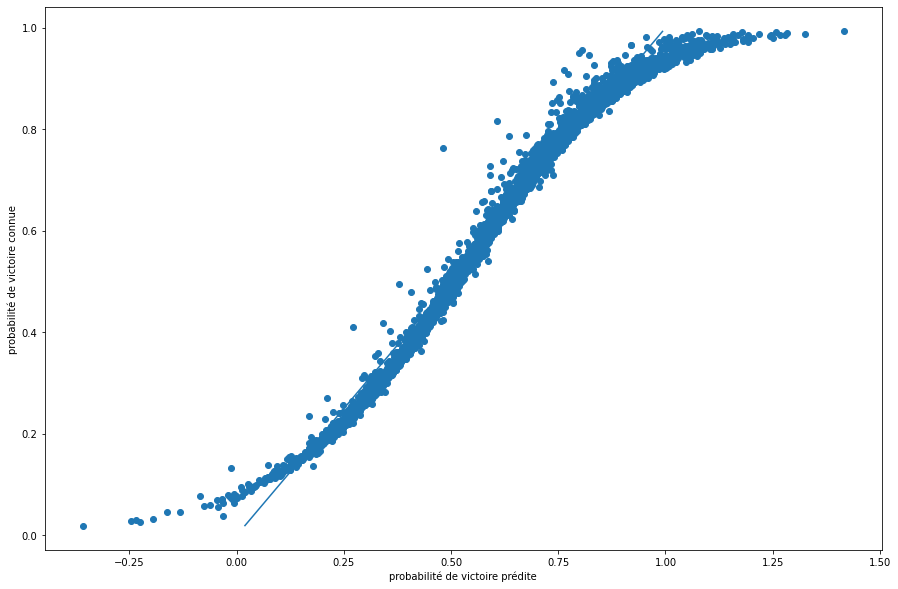

In [32]:
pred_test = lr.predict(X_test)
plt.figure(figsize=(15,10))
plt.scatter(pred_test,y_test)
plt.plot((y_test.min(),y_test.max()),(y_test.min(),y_test.max()))
plt.xlabel("probabilité de victoire prédite")
plt.ylabel("probabilité de victoire connue")
plt.show()